
# Logistic Regression _ Banking_deposit_predictor

- Given a dataset of bank client info. We need to predict whether the client has subscribed a term deposit. 



## Attribute information For bank dataset

### Input variables:
#### bank client data:
   
1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")
    
### related with the last contact of the current campaign:
   
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

### other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Logistic Regression Assumptions
- Import new data set
- Understand the dataset. check info and describe.
- Look into each category values. 
- Do necessary conversions of dtypes.
- Perform conversion on categorical and binomial data.
- Check for null or duplicate values.



# Steps: 

1. Import new data set
    - Understand the dataset. check info and describe.
    - Look into each category values. 
    - Do necessary conversions of dtypes.
    - Perform conversion on categorical and binomial data.
    - Check for null or duplicate values.


2. EDA Report and Profiling
    - Observe the values in EDA report.
    - Check for autocorellations.
    - Understand the data patterns.
    

3. Data Deep Dive
    - Observe each variables in dataset.
    - Check if its a good predictor or not.
    - Decide which all variables to keep and discard.


4. Final Data Columns
    - Discard unused data columns.
    - Create dummy variables for categorical data.


5. Logistic Modelling
    - Define the final training dataset.
    - Check for data bias.
    - Method 1 Random Sampler and Model Implementation.
    - Method 2 SMOTETomek method and Model Implementation.


6. Conclusion
    - Compare both the models and decide which one to implement. 
   


# Importing new dataset

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import imblearn

In [69]:
data = pd.read_csv("data\bank-full.csv", header=0, quotechar= '"',sep= ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [70]:
data.info() 
#There are many object data types which needs to be converted to categorical dummies or int dtypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#Converting yes/no values to 1 and 0 respectively:

# For y
data['y']=np.where(data['y'] =='no', 0, data['y'])
data['y']=np.where(data['y'] =='yes', 1, data['y'])
data['y'] = data['y'].astype("int64")

# For default
data['default']=np.where(data['default'] =='no', 0, data['default'])
data['default']=np.where(data['default'] =='yes', 1, data['default'])
data['default'] = data['default'].astype("int64")

# For housing
data['housing']=np.where(data['housing'] =='no', 0, data['housing'])
data['housing']=np.where(data['housing'] =='yes', 1, data['housing'])
data['housing'] = data['housing'].astype("int64")

# For loan
data['loan']=np.where(data['loan'] =='no', 0, data['loan'])
data['loan']=np.where(data['loan'] =='yes', 1, data['loan'])
data['loan'] = data['loan'].astype("int64")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [5]:
#Shape of the data set
data.shape

(45211, 17)

# EDA Report and Profiling

In [6]:
#EDA_report= pp.ProfileReport(data)
#EDA_report.to_file(output_file='report_bank.html') 
# Report reveals no null values 
# There are no Duplicate cells in this bank dataset
#Out of all the entries about 88.3% is False for variable y.

# MANY more insights have been derived from the profiling report.

# Data Deep Dive Exploration:

In [7]:
data.groupby('y').mean() #Exploring y

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
y,,,,,,,,,,
0,40.838986,0.019112,1303.714969,0.581008,0.169330,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,0.009832,1804.267915,0.365854,0.091511,15.158253,537.294574,2.141047,68.702968,1.170354


In [8]:
data.groupby('y').median() #Exploring y

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
y,,,,,,,,,,
0,39,0,417,1,0,16,164,2,-1,0
1,38,0,733,0,0,15,426,2,-1,0


### Effect of Age on Term Subscription y

    - Age may be a good predicter for y. Reson being that people who are in their mid 30s will have enough money to 
    subscribe for the term deposit. 
    - Retired people may also be interested.

In [9]:
# Looking at 'age'
data.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

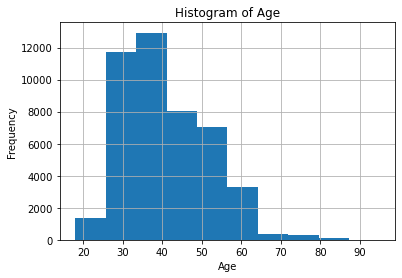

In [10]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

5289


(array([ 320., 1462., 1295.,  726.,  648.,  497.,  148.,  138.,   48.,
           7.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

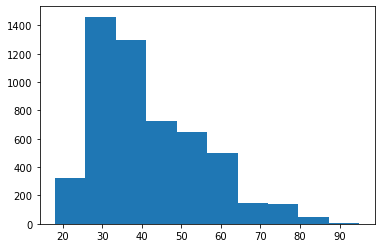

In [11]:
filt_age = data.y == 1
data.loc[filt_age]['age'].value_counts().head(10)
print(data.loc[filt_age]['age'].count()) #5k people.
plt.hist(data.loc[filt_age]['age']) # number of people who actually took the term deposits.

In [12]:
#The diversity in age is too large and cannot be taken into account unless we split the age data into range.
data.age = data.assign(age=pd.cut(data['age'],bins=[18, 25, 45, 60, 100],labels=['age18_25', 'age25_45', 'age45_60', 'age60_100']))['age']


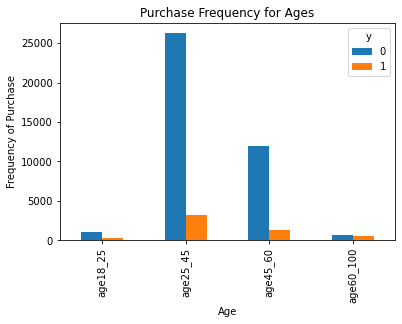

In [13]:
#Visulalization
pd.crosstab(data.age,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency of Purchase')
plt.show()

#### Inferences:
    -Most people in the bank are in the middle age group 30 to 41.
    - Highest number of investements are from the same group.
    - More targeted campaign towards this age group can increase the term deposits.
    - After age has been categorised, it can be taken into consideration.

### Effect of Job on Term Subscription y

    - It is logical to assume that the job of a person is a good predictor for y.
    - Different jobs and salaries have a strong impact on the data. 

In [14]:
# Looking at 'job'
print(data.job.unique()) 
print(data.job.value_counts())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [15]:
job_cat = data.groupby('job') # Distribution of term deposits among various job categories.
job_cat['y'].value_counts() #Count Distribution

job            y
admin.         0    4540
               1     631
blue-collar    0    9024
               1     708
entrepreneur   0    1364
               1     123
housemaid      0    1131
               1     109
management     0    8157
               1    1301
retired        0    1748
               1     516
self-employed  0    1392
               1     187
services       0    3785
               1     369
student        0     669
               1     269
technician     0    6757
               1     840
unemployed     0    1101
               1     202
unknown        0     254
               1      34
Name: y, dtype: int64

In [16]:
filt_job = data.y == 1
data.loc[filt_job]['job'].value_counts(normalize = True) #Percentage distribution of people who bought the deposits.
#Mangement people are most likely to opt for the term deposists. 

management       0.245982
technician       0.158820
blue-collar      0.133863
admin.           0.119304
retired          0.097561
services         0.069767
student          0.050860
unemployed       0.038192
self-employed    0.035356
entrepreneur     0.023256
housemaid        0.020609
unknown          0.006428
Name: job, dtype: float64

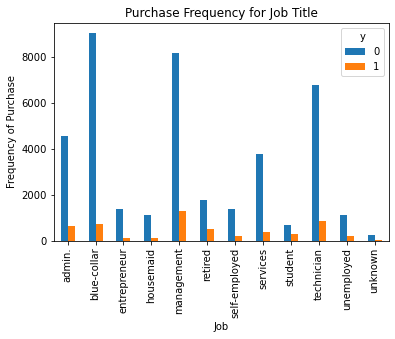

In [17]:
#Visulalization
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

#### Inferences:
    - Mangement people are most likely to opt for the term deposists. 
    - Housemaids are least likely to subsbscribe.
    - We could increase communications with the top 5 to increase subscriptions
    - Job will be considered in this model

### Effect of Marital on Term Subscription y

    - Marital status may or may not be a good factor for predicting y subscription. (Not Sure)
    - Divorced people maybe less likely to avail subscription if they have recently gone through a divorce.

In [18]:
# Looking at 'marital' 
print(data.marital.unique()) 
print(data.marital.value_counts())

['married' 'single' 'divorced']
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [19]:
marital_cat = data.groupby('marital') # Distribution of term deposits among marital categories.
marital_cat['y'].value_counts() #Count Distribution

marital   y
divorced  0     4585
          1      622
married   0    24459
          1     2755
single    0    10878
          1     1912
Name: y, dtype: int64

In [20]:
filt_marital = data.y == 1
data.loc[filt_marital]['marital'].value_counts(normalize = True) #Percentage distribution of people who bought the deposits.

married     0.520892
single      0.361505
divorced    0.117603
Name: marital, dtype: float64

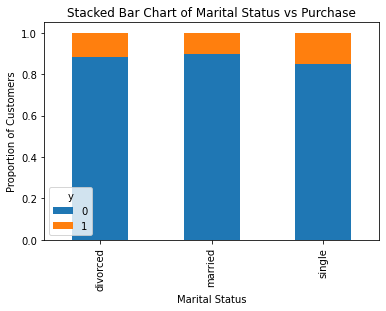

In [21]:
#Visualizations
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

#### Inferences:
    - Married people with stable jobs are very likely to avail the subscription. 
    Also, Married people meet the mean age of the dataset (40 years)
    - Divorced people are less likely to avail the subscription, but they would avail after a span of time(Assuming they are divorced recently)
    - Singles who are also likely to avail the subscription.
    - Marital will be considered in this model.
   

### Effect of Education on Term Subscription y

    - Education is definitly a strong factor in predicting y.
    - It is more likely that people who are more educated and those who have a good understanding of the deposit will avail the subscription.

In [22]:
# Looking at 'education' 
print(data.education.unique()) 
print(data.education.value_counts())

['tertiary' 'secondary' 'unknown' 'primary']
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [23]:
educ_cat = data.groupby('education') # Distribution of term deposits among education categories.
educ_cat['y'].value_counts() #Count Distribution

education  y
primary    0     6260
           1      591
secondary  0    20752
           1     2450
tertiary   0    11305
           1     1996
unknown    0     1605
           1      252
Name: y, dtype: int64

In [24]:
filt_educ = data.y == 1
data.loc[filt_educ]['education'].value_counts(normalize = True) #Percentage distribution of people who bought the deposits.

secondary    0.463226
tertiary     0.377387
primary      0.111741
unknown      0.047646
Name: education, dtype: float64

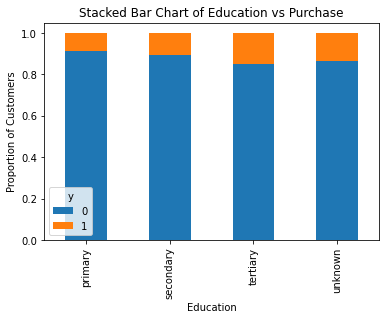

In [25]:
#Visualization
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

#### Inferences:
    - People who recieved Secondary and Tertiary education are most likely to opt for the term deposists.
    - People with primary education can be enlightened with a comprehensive campaign targeted at them.
    - Education will be considered in this model

### Effect of Contact,pdays,previous on Term Subscription y

    - Contact is not a strong factor in evaluating y
    - However, certain anomalies are observed in the case of contact.

In [26]:
# Looking at 'contact' 
print(data.contact.unique()) 
print(data.contact.value_counts()) 
#Note the Unknown values. Without the contact number, there will not be able to make a call.
#We can perform a truth test for the contact values and previous call values. 

['unknown' 'cellular' 'telephone']
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [27]:
count_no_pdays = len(data[data['pdays']==-1])
count_no_pdays 
#36954 customers were not previously contacted. 
#Why? Only if they are contacted they will be aware of the term deposit
#Is it because their contact number was not availabe?

36954

In [28]:
data['contact'].value_counts() 
#The cellular of about 31k people are known yet less than 8.3k people were contacted. Why?

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [29]:
contact_verify = data.groupby('contact')
contact_verify['previous'].value_counts().tail(12) 
# 'Unknown' contacts have not been contacted. 
#70 people have been not contacted in the dataset. since the number is small, it is not significant

contact  previous
unknown  0           12950
         2              24
         1              14
         3               8
         4               5
         5               5
         6               5
         7               4
         12              2
         11              1
         21              1
         41              1
Name: previous, dtype: int64

In [30]:
#No of people who availed subscription after being contacted during campaign.
filt_pdays = data.pdays != -1 # == -1 means not contacted before in campaign.
data.loc[filt_pdays]['y'].value_counts(normalize = True)

0    0.769287
1    0.230713
Name: y, dtype: float64

#### Inferences:
    - There is a lot of discrepency involved in contacting the fellow customers. 
    - Out of its 45k customers, the bank had the contact info of 31k people. However, less than 8.3k people where contacted regarding the campaign.
    - Out of almost 8.3k people contacted, 23% availed the subscription. Therefore, increasing number of calls can increase the number of subscriptions of term deposit.
    - we will not be considering pdays or previous in our modelling due to it's diversity.
    - we will however consider contact.

### Effect of Default on Term Subscription y

    - this variable is to check whether the customer has credit in default.
    

In [31]:
# Looking at 'default' 
print(data.default.unique()) 
print(data.default.value_counts())

[0 1]
0    44396
1      815
Name: default, dtype: int64


In [32]:
default_cat = data.groupby('default') # Distribution of term deposits in default credit.
default_cat['y'].value_counts() #Count Distribution

default  y
0        0    39159
         1     5237
1        0      763
         1       52
Name: y, dtype: int64

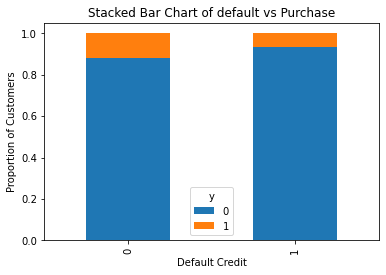

In [33]:
#Visualization
table=pd.crosstab(data.default,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of default vs Purchase')
plt.xlabel('Default Credit')
plt.ylabel('Proportion of Customers')
plt.show()

#### Inferences:
    - Default credits may be a good predictor.  
    - Around 5k customers who do not have default credit have opted for the term deposit
    - Default will be considered in this model
    

### Effect of Housing on Term Subscription y
     - This variable is to check whether the customer has applied for housing loan. 
     - It is fair enough to assume that a person on loan is less likely to opt for term deposits.

In [34]:
# Looking at 'housing' 
print(data.housing.unique()) 
print(data.housing.value_counts()) # A lot of customers have opted for the housing loan

[1 0]
1    25130
0    20081
Name: housing, dtype: int64


In [35]:
housing_cat = data.groupby('housing') # Distribution of customers who opted for housing loan and term deposits.
housing_cat['y'].value_counts() #Count Distribution

housing  y
0        0    16727
         1     3354
1        0    23195
         1     1935
Name: y, dtype: int64

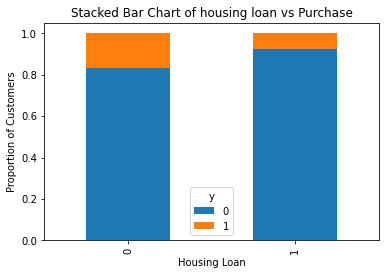

In [36]:
#Visualization
table=pd.crosstab(data.housing,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of housing loan vs Purchase')
plt.xlabel('Housing Loan')
plt.ylabel('Proportion of Customers')
plt.show()

#### Inferences:
    - Our initial assumption is right. People who have not opted for housing loan are more likely to avail term deposits
    - Housing will be considered in this model.

### Effect of loan on Term Subscription y

In [37]:
#Looking at 'loan' 
loan_cat = data.groupby('loan') # Distribution of customers who opted for personal loan and term deposits.
loan_cat['y'].value_counts() #Count Distribution

loan  y
0     0    33162
      1     4805
1     0     6760
      1      484
Name: y, dtype: int64

#### Inferences:
    - Similar to the housing loan scenario, people who have not taken a personal loan are more likely to subscribe for term deposits
    - loan will be considered.

### Effect of day on Term Subscription y

#### Inferences:
    - Day cannot be a good factor since there are 30 to 31 days in a month which can be totally random.
    - Month would be a better predictor.
    - will not be considered for the model.

### Effect of Month on Term Subscription y

In [38]:
#Looking at 'Month' 
month_cat = data.groupby('month') # Variance in sales of y during various months
month_cat['y'].value_counts() #Count Distribution

month  y
apr    0     2355
       1      577
aug    0     5559
       1      688
dec    0      114
       1      100
feb    0     2208
       1      441
jan    0     1261
       1      142
jul    0     6268
       1      627
jun    0     4795
       1      546
mar    1      248
       0      229
may    0    12841
       1      925
nov    0     3567
       1      403
oct    0      415
       1      323
sep    0      310
       1      269
Name: y, dtype: int64

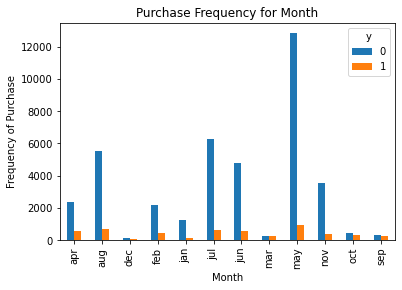

In [39]:
#Visulalization
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

#### Inferences:
    - This is certainely a good factor for the prediction for y.
    - Good trend is observed in different months for the purchases of term deposits.
    - Month will be considered.

### Effect of Campaign on Term Subscription y

    - This could be a good factor in pursuing customers to avail the subscription.
    - More the number of calls, more likely to avail subscription. We have to to verify that. 

In [40]:
#Looking at 'Campaign' 
campaign_cat = data.groupby('campaign') # Variance in sales of y during various months
campaign_cat['y'].value_counts() #Count Distribution

campaign  y
1         0    14983
          1     2561
2         0    11104
          1     1401
3         0     4903
               ...  
50        0        2
51        0        1
55        0        1
58        0        1
63        0        1
Name: y, Length: 70, dtype: int64

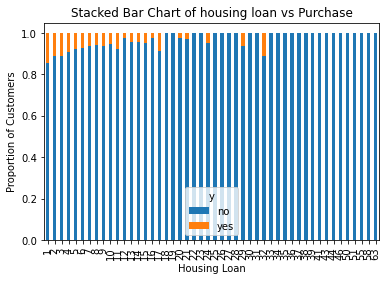

In [77]:
table=pd.crosstab(data.campaign,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of housing loan vs Purchase')
plt.xlabel('Housing Loan')
plt.ylabel('Proportion of Customers')
plt.show()

#### Inferences:
    - Our assumption is wrong. This is not a good factor.
    - Most of the people who availed the deposits were those with 1 to 5 calls. 
    - More calls infact resulted in lesser subscriptions from the customer.
    - This variable cannot be used in predicting y.

### Effect of poutcome on Term Subscription y

    - poutcome may be a good factor in determining the term desposits.
    - the outcome of a call is verified by poutcome.
    - However, the large number of unknown values are troublesome.

In [42]:
# Looking at 'poutcome' 
print(data.poutcome.unique()) 
print(data.poutcome.value_counts()) #Note the number of Unknown values in this case. The dataset is critically flawed

['unknown' 'failure' 'other' 'success']
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


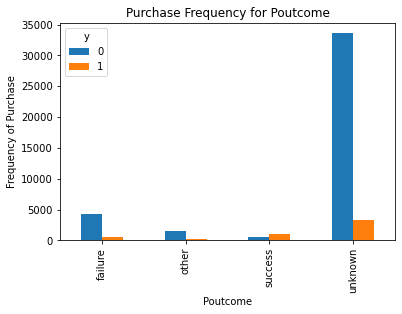

In [43]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show() #

#### Inferences:
    - Out of all the people contacted, few them have subscribed for the deposits.
    - This might be a good factor in determining y.
    - However, there is a large number of unknowns in this as well.
    - this variable will be considered in building the model.

# Final Data Columns

## Drop unused columns and create new dataset



In [44]:
dataclean = data.copy()
dataclean = dataclean.drop(['day','duration','balance','campaign','pdays','previous'], axis =1)
dataclean.head()


,age,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,age45_60,management,married,tertiary,0,1,0,unknown,may,unknown,0
1,age25_45,technician,single,secondary,0,1,0,unknown,may,unknown,0
2,age25_45,entrepreneur,married,secondary,0,1,1,unknown,may,unknown,0
3,age45_60,blue-collar,married,unknown,0,1,0,unknown,may,unknown,0
4,age25_45,unknown,single,unknown,0,0,0,unknown,may,unknown,0


## Creating Dummy Variable

- Items that require dummy variables: age, job, marital, education, contact, month, poutcome

In [45]:
dumy = ['age','job','marital','education','contact','month','poutcome']
dataclean1 =  pd.get_dummies(dataclean,columns=['age','job','marital','education','contact','month','poutcome'])
#Getting column list via => cols = list(df.columns.values)
dataclean1 = dataclean1[['y','default','housing','loan','age_age18_25','age_age25_45','age_age45_60','age_age60_100',
 'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
 'job_services','job_student','job_technician','job_unemployed','job_unknown','marital_divorced','marital_married',
 'marital_single','education_primary','education_secondary','education_tertiary','education_unknown','contact_cellular',
 'contact_telephone','contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
 'poutcome_success', 'poutcome_unknown']] #Rearranging the columns 
dataclean1.head()

,y,default,housing,loan,age_age18_25,age_age25_45,age_age45_60,age_age60_100,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Logistic Modelling

## Defining dataset

In [46]:

# define dataset

X = dataclean1[['default','housing','loan','age_age18_25','age_age25_45','age_age45_60','age_age60_100',
 'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
 'job_services','job_student','job_technician','job_unemployed','job_unknown','marital_divorced','marital_married',
 'marital_single','education_primary','education_secondary','education_tertiary','education_unknown','contact_cellular',
 'contact_telephone','contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
 'poutcome_success', 'poutcome_unknown']]
y = dataclean['y']

# Choosing between Recall and Precision

In this problem, predicting if a person has subscribed for a term deposit is not very critical. The costs for predicting wrong are not very critical. Hence we would go for Higher Precision. Since the dataset is highly biased, a more precise model is what we could work with.

# Removing Bias in dataset

- There is high bias in this dataset which needs to be resolved before modelling.

In [47]:
dataclean1.y.value_counts(normalize = True)
# HIGHLY BIASED DATASET WITH STRONG INCLINATION TOWARDS NO.
# Therefore, our model will have a strong bias associated with it. 
# This issue can be solved by using a combination of undersampling and oversampling together for best results.

0    0.883015
1    0.116985
Name: y, dtype: float64

## Using Oversampling and Undersampling

- Random Oversampling: Randomly duplicate examples in the minority class.
- Random Undersampling: Randomly delete examples in the majority class.

- Reference1: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

- Reference2: https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html

- Our dataset has a 1:8 class distribution, we could first apply oversampling to increase the ratio to 1:4 by duplicating examples from the minority class, then apply undersampling to further improve the ratio to 1:2 by deleting examples from the majority class.

#### Method 1
- I tried implementing using imbalanced-learn by using a RandomOverSampler with sampling_strategy set to 0.25 (25%), then using a RandomUnderSampler with a sampling_strategy set to 0.5 (50%). However, the desired outcome was not reached.


#### Method 2
- Using SMOTETomek method, dataset was oversampled and undersampled automatically and desired output is reach with about 80% auc.


# Method 1 - Using RandomUnderSampling & RandomOverSampling 

In [78]:
#Using Reference 1

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#summarize class distribution
print(Counter(y))

# define pipeline
over = RandomOverSampler(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)
pipeline = Pipeline(steps=[('o', over), ('u', under)])

#Implementing the pipeline

X_res, y_res = pipeline.fit_resample(X, y)

#summarize class distribution
print(Counter(y_res))

Counter({0: 39922, 1: 5289})
Counter({0: 19960, 1: 11976})


# Fitting a logistic Regression Model (Method1)

In [79]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X_res,y_res)

LogisticRegression()

In [80]:
#Predict for X dataset
y_pred = classifier.predict(X_res) 

In [52]:
y_pred_df= pd.DataFrame({'actual': y_res,'predicted_prob': classifier.predict(X_res)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
31931,1,0
31932,1,0
31933,1,0
31934,1,0


### Confusion Matrix & Classification Report (Method1)

In [81]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_res,y_pred)
print (confusion_matrix)

[[18338  1622]
 [ 6399  5577]]


In [82]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_res,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82     19960
           1       0.77      0.47      0.58     11976

    accuracy                           0.75     31936
   macro avg       0.76      0.69      0.70     31936
weighted avg       0.75      0.75      0.73     31936



In [83]:
classifier.predict_proba(X_res)

array([[0.82794007, 0.17205993],
       [0.59840971, 0.40159029],
       [0.79472413, 0.20527587],
       ...,
       [0.55197233, 0.44802767],
       [0.37042572, 0.62957428],
       [0.60665972, 0.39334028]])

###  ROC Curve and AUC Value (method1)

AUC vale = 0.6922094188376754


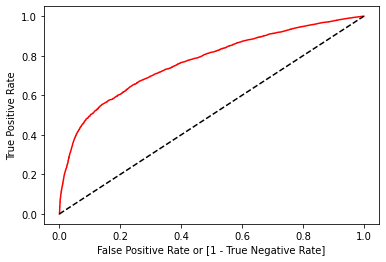

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_res, classifier.predict_proba (X_res)[:,1])

auc = roc_auc_score(y_res, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

print("AUC vale = "+str(auc))


# Using SMOTETomek (Method2)

In [85]:
#Using Reference 2
from imblearn.combine import SMOTETomek
from collections import Counter


# define dataset

X = dataclean1[['default','housing','loan','age_age18_25','age_age25_45','age_age45_60','age_age60_100',
 'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
 'job_services','job_student','job_technician','job_unemployed','job_unknown','marital_divorced','marital_married',
 'marital_single','education_primary','education_secondary','education_tertiary','education_unknown','contact_cellular',
 'contact_telephone','contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
 'poutcome_success', 'poutcome_unknown']]
y = dataclean['y']

# summarize class distribution
print(Counter(y))

smt = SMOTETomek(sampling_strategy = 'auto')
X_res1, y_res1 = smt.fit_resample(X, y)

# summarize class distribution
print(Counter(y_res1))

Counter({0: 39922, 1: 5289})
Counter({0: 39803, 1: 39803})


# Fitting a logistic Regression Model (Method2)

In [86]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X_res1,y_res1)

LogisticRegression()

In [87]:
#Predict for X dataset
y_pred = classifier.predict(X_res1) 

In [88]:
y_pred_df= pd.DataFrame({'actual': y_res1,'predicted_prob': classifier.predict(X_res1)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
79601,1,1
79602,1,1
79603,1,0
79604,1,1


#### Confusion Matrix & Classification Report (Method1)

In [89]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_res1,y_pred)
print (confusion_matrix)

[[35615  4188]
 [10760 29043]]


In [90]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_res1,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83     39803
           1       0.87      0.73      0.80     39803

    accuracy                           0.81     79606
   macro avg       0.82      0.81      0.81     79606
weighted avg       0.82      0.81      0.81     79606



In [91]:
classifier.predict_proba(X_res1)

array([[0.86538674, 0.13461326],
       [0.81656004, 0.18343996],
       [0.97702938, 0.02297062],
       ...,
       [0.55979128, 0.44020872],
       [0.37438092, 0.62561908],
       [0.44278   , 0.55722   ]])

####  ROC Curve and AUC Value (method1)

AUC vale = 0.8122252091550888


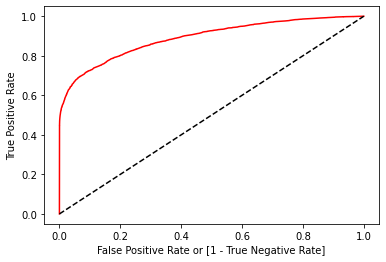

In [92]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_res1, classifier.predict_proba (X_res1)[:,1])

auc1 = roc_auc_score(y_res1, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

print("AUC vale = "+str(auc1))

# Conclusion

- Since the dataset was higly biased, we have tried out two data balancing techniques. 
- RandomSampler gave about 75% accuracy with more precision but auc value is poor.
- SMOTETomek gave 81% accuracy with a balance of precision and recall and also gave good auc value. 
- Processing time for SMOTETomek was very large. But results are good. 